# Dog Names

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

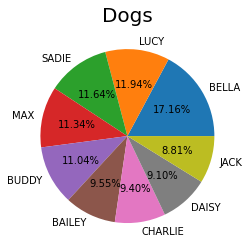

In [2]:
x = []
y = []

with open('dog-names-over-time-1.csv') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    
    for row in plots:
        x.append(row[0])
        y.append(row[1])


plt.pie(y [1:10], labels = x [1:10], autopct = '%.2f%%')
plt.title('Dogs', fontsize = 20)

plt.show()

In [7]:
df = pd.read_csv('dog-names-over-time-1.csv', header=0, sep=' *, *', skipinitialspace=True, engine='python')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16232 entries, 0 to 16231
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DogName  16232 non-null  object
 1   Count    16232 non-null  int64 
 2   Rank     16232 non-null  int64 
 3   Date     16232 non-null  object
 4   Set      16232 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 634.2+ KB


## Top 10 Dog Names

In [11]:
df.head(10)

,DogName,Count,Rank,Date,Set
0,BELLA,115,1,07/13/2017 12:00:00 AM,1
1,LUCY,80,2,07/13/2017 12:00:00 AM,1
2,SADIE,78,3,07/13/2017 12:00:00 AM,1
3,MAX,76,4,07/13/2017 12:00:00 AM,1
4,BUDDY,74,5,07/13/2017 12:00:00 AM,1
5,BAILEY,64,6,07/13/2017 12:00:00 AM,1
6,CHARLIE,63,7,07/13/2017 12:00:00 AM,1
7,DAISY,61,8,07/13/2017 12:00:00 AM,1
8,JACK,59,9,07/13/2017 12:00:00 AM,1
9,GINGER,58,10,07/13/2017 12:00:00 AM,1


## Bottom 10 Dog Names

In [10]:
df.tail(10)

,DogName,Count,Rank,Date,Set
16222,ZOEY MARIE,1,1259,01/09/2019 12:00:00 AM,4
16223,ZONA,1,1259,01/09/2019 12:00:00 AM,4
16224,ZOOIE,1,1259,01/09/2019 12:00:00 AM,4
16225,ZORBA,1,1259,01/09/2019 12:00:00 AM,4
16226,ZORRA,1,1259,01/09/2019 12:00:00 AM,4
16227,ZOTTER,1,1259,01/09/2019 12:00:00 AM,4
16228,ZSA ZSA,1,1259,01/09/2019 12:00:00 AM,4
16229,ZUILA,1,1259,01/09/2019 12:00:00 AM,4
16230,ZUNI,1,1259,01/09/2019 12:00:00 AM,4
16231,ZURI,1,1259,01/09/2019 12:00:00 AM,4
